In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from numpy.random import choice

import math

In [2]:
def L(x):
    """ Calculates L(x): Const Functional"""
    return 1/2*(-7/12*x**3+7/2*x**2-8*x+2)**2 + (x+2)**2

In [3]:
def L1(x):
    """ Calculates L'(x): 1. derivative of L(x)"""
    return (-7/12*x**2+7*x-8)*(-7/12*x**3+7/2*x**2-8*x+2)+2*(x + 2)


In [4]:
def L2(X):
    """Calculates L''(x): 2. derivative of L(x)"""
    return (-7/6*x+7)*(-7/12*x**3+7/2*x**2-8*x+2)+(-7/4*x**2+7*x-8)*(-7/12*x**2+7*x-8)+2

In [5]:
def steepest_descent_method(x_Old, L1_xOld):
    """Calculates the updated value of xOld via the steepest descent method"""
    return x_Old-L1_xOld


In [6]:
def steepest_descent_method_with_stepsize(xOld, L1_xOld, step_size):
    """Calculates the updated value of xOld via the steepest descent method including step size"""
    return xOld - step_size*L1_xOld

In [7]:
def newtons_method(xOld, L1_xOld, L2_xOld):
    """calculates the updated value of xOld via the Newton method"""
    return xOld - L1_xOld/L2_xOld


MAP Computation

In [8]:
x_hat = minimize(L,0)
x_hat

      fun: 4.976489682665414
 hess_inv: array([[0.019236]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.18371087])

In [9]:
def plot_L(L, x, which_function):
    plt.plot(x, L(x), c = "#2E8B57")
    plt.scatter(x_hat.x, 0, s= 50, c="black", marker="x")
    plt.legend([which_function, "argmin L(x)"])
    plt.xlabel("x")
    plt.ylabel(which_function)
    plt.title(which_function+" and $\hat{x}*$ for which $['(\hat{x}*0$ is minimal")


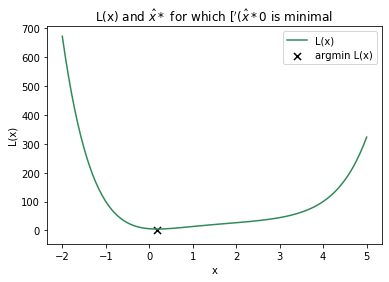

In [10]:
x = np.linspace(-2, 5, 100)
plot_L(L, x, "L(x)")

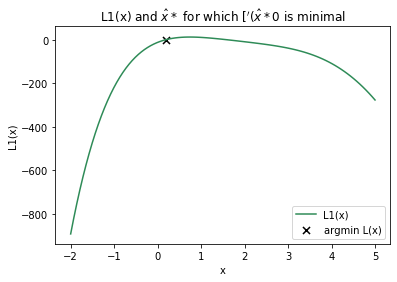

In [11]:
plot_L(L1, x, "L1(x)")

In [12]:
iters = 100
step_size = 0.002
x0 = -2
x_steepest_old, x_steepest_with_step_old, x_newton_old = x0, x0, x0

for i in range(iters):
    x_steepest = steepest_descent_method(x_steepest_old, L1(x_steepest_old))
    
    x_steepest_with_step = steepest_descent_method_with_stepsize(x_steepest_with_step_old, L1(x_steepest_with_step_old),
                                                                step_size)
    x_newton = newtons_method(x_newton_old, L1(x_newton_old), L2(x_newton_old))
    x_steepest_old = x_steepest
    x_steepest_with_step_old = x_steepest_with_step
    x_newton_old = x_newton

print(f"Steepest without stepsize: {x_steepest}")
print(f"Steepest with step size {step_size}: {x_steepest_with_step}")
print(f"Newton method:{x_newton}")


Steepest without stepsize: nan
Steepest with step size 0.002: 0.18321822958019704
Newton method:[0.18058585 0.18136415 0.18195346 0.18238621 0.1826932  0.18290258
 0.18303913 0.18312373 0.18317312 0.18320001 0.18321347 0.18321955
 0.18322194 0.18322271 0.18322287 0.18322286 0.18322283 0.18322281
 0.18322281        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf

/home/sefika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sefika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sefika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sefika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sefika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package s